In [5]:
import torch
from torchvision import transforms
import torch.utils.data as data
from Dataset.Dataset import Dataset
import matplotlib.pyplot as plt

In [6]:
path_to_train_lmdb_dir = "SVHN_lmdb2/train.lmdb"
# path_to_val_lmdb_dir = "SVHN_lmdb2/val.lmdb"

config = {
    "model_name": "mobilenet_spp",
    "batch_size": 128,
    "optimizer": "SGD",
    "lr": 0.008,
    "momentum": 0.7,
    "mobile_net_spp_level": 3,
    "mobile_net_spp_type": "max_pool"
}

In [7]:
train_transform = transforms.Compose([
    # transforms.RandomRotation(degrees=(-30, 30)),
    transforms.ColorJitter(brightness=0.7, contrast=.5, saturation=.1, hue=.1),
    transforms.ToTensor(),
    transforms.RandomAffine(
                            degrees=(-30, 30),
                            translate=(0.2,0.2),
                            scale=(0.7,1.3),
                            # interpolation=transforms.functional.InterpolationMode.NEAREST,
                            shear=60)
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
train_loader = torch.utils.data.DataLoader(Dataset(path_to_train_lmdb_dir, train_transform, dataset_type="full"),
                                           batch_size=config["batch_size"], shuffle=True, num_workers=0)
# test_transform = transforms.Compose([
#     transforms.RandomRotation(degrees=(-30, 30)),
#     transforms.ColorJitter(brightness=0.7, contrast=.5, saturation=.1, hue=.1),
#     transforms.ToTensor(),
#     # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
# ])
# test_loader = torch.utils.data.DataLoader(Dataset(path_to_val_lmdb_dir, test_transform),
#                                           batch_size=config["batch_size"], shuffle=False,
#                                           num_workers=0)

torch.Size([3, 128, 128])


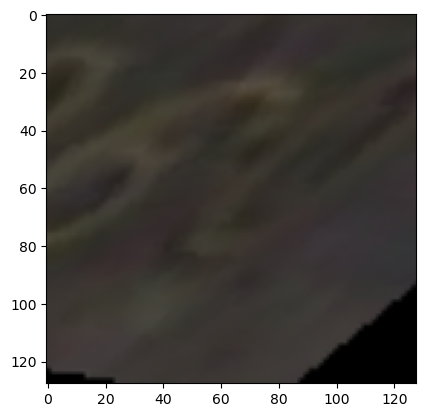

number: 26
torch.Size([3, 128, 128])


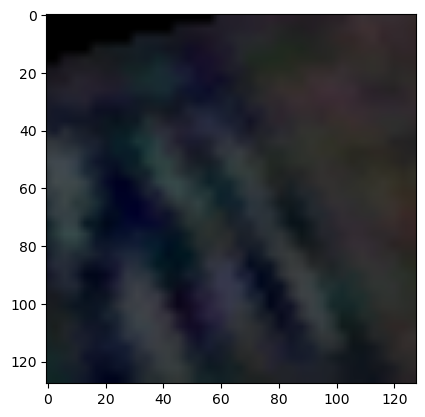

number: 48
torch.Size([3, 128, 128])


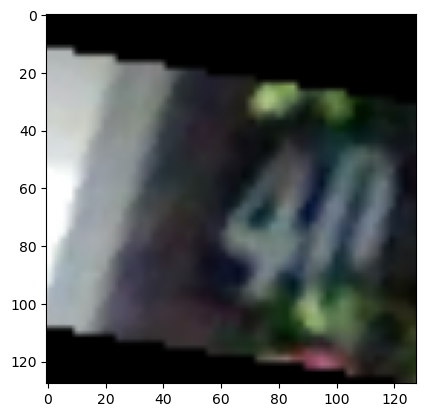

number: 40
torch.Size([3, 128, 128])


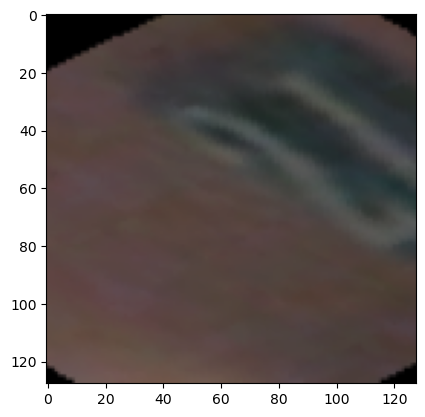

number: 24
torch.Size([3, 128, 128])


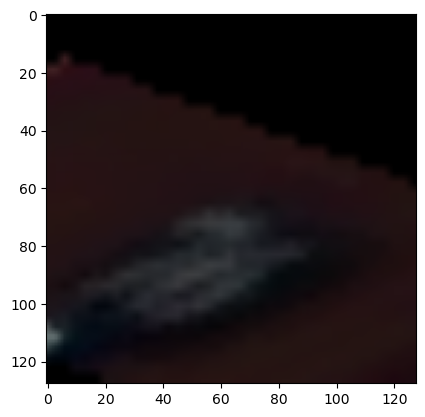

number: 76
torch.Size([3, 128, 128])


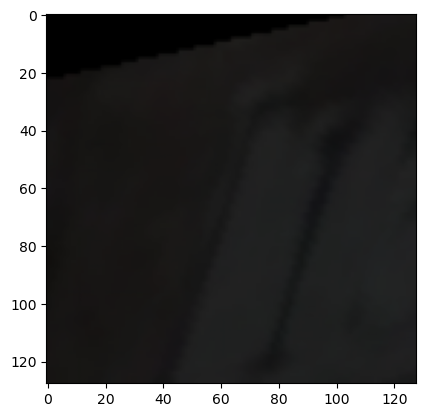

number: 13
torch.Size([3, 128, 128])


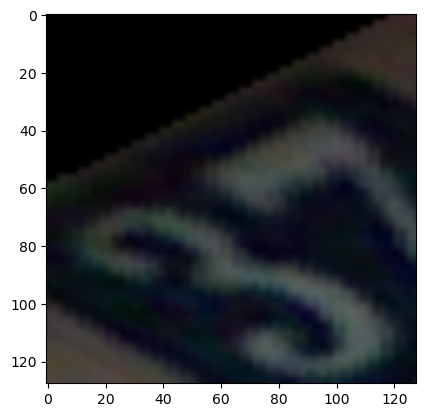

number: 37
torch.Size([3, 128, 128])


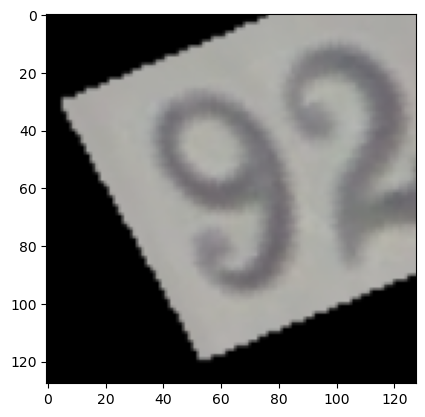

number: 92
torch.Size([3, 128, 128])


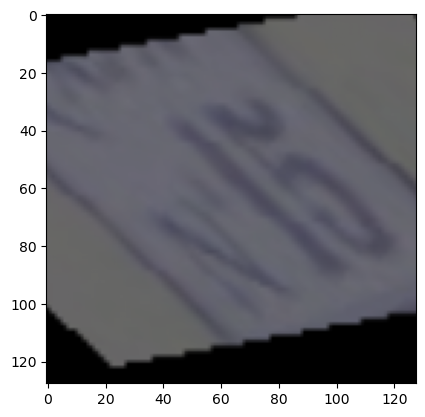

number: 15
torch.Size([3, 128, 128])


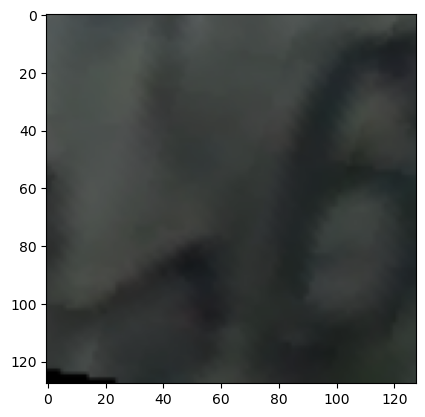

number: 64


In [8]:
max_cnt = 10
cnt = 0
# display train img
for batch_idx, (images, digits_labels) in enumerate(train_loader):
    for j, img in enumerate(images):
        print(img.shape)
        img = img.permute(1, 2, 0)
        img = img.numpy()
        # print(img)
        plt.imshow(img)
        plt.show()
        # print labels
        print(f"number: {digits_labels[0][j]}{digits_labels[1][j]}")
        cnt += 1
        if cnt == max_cnt:
            break
    if cnt == max_cnt:
        break